<IPython.core.display.Javascript object>


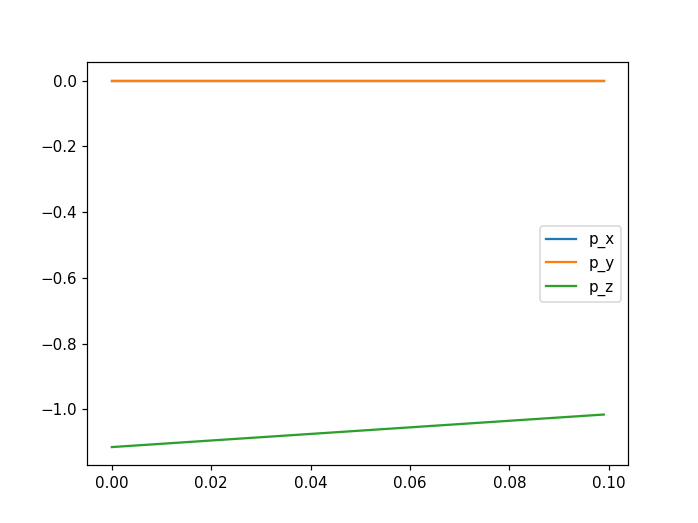

In [67]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

p_i = np.array([0, 0, -1.115])

p_f = np.array([0, 0, -0.9])

p = []

x_range = np.arange(0, 0.1, 0.001)

for s in x_range:
    p_s = p_i + (s / np.linalg.norm(p_f - p_i)) * (p_f - p_i)
    p.append(p_s)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_range, [x[0] for x in p],label="p_x")
ax.plot(x_range, [x[1] for x in p],label="p_y")
ax.plot(x_range, [x[2] for x in p],label="p_z")
plt.legend()

<IPython.core.display.Javascript object>


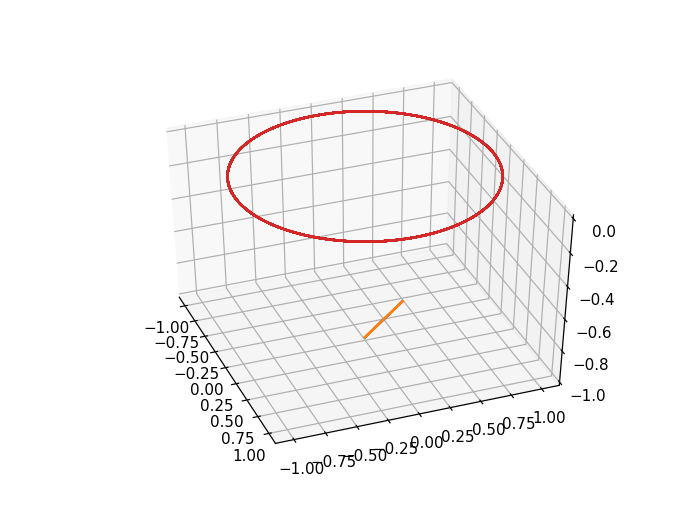

          7           6           5           4           3           2
-0.01083 x - 0.01521 x - 0.01969 x - 0.02015 x - 0.00231 x + 0.07573 x + 0.2981 x - 1.282e-16
[-1.08305502e-02 -1.52063254e-02 -1.96854957e-02 -2.01473681e-02
 -2.30997693e-03  7.57270524e-02  2.98101828e-01 -1.28197512e-16]
7
[0, 0.25, 0]
[0, 0.25, 0]
-2.431176953566184
-2.431176953566184


/home/loukas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/loukas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/loukas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/loukas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/loukas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/loukas/.local/lib/python3.6/site-packages/IPython/core/interacti

In [269]:
## from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.set_xlim3d(0.2, -0.2)
#ax.set_ylim3d(-0.2, 0.2)
#ax.set_zlim3d(-1.5, -1)


t = [0, 0.75, 1.5]
x = [0, 0, 0]
x_reverse = x[::-1]

y = [0, 0.25, 0]
y_reverse = y[::-1]

z = [-1, -0.85, -1]
z_reverse = z[::-1]

t_new = np.linspace(t[0], t[-1], 200)

forward_order = 7
reverse_order = 7

polynomial_x = np.polyfit(t, x, forward_order)
f_x = np.poly1d(polynomial_x)
x_new = f_x(t_new)

polynomial_x_reverse = np.polyfit(t, x_reverse, reverse_order)
f_x_reverse = np.poly1d(polynomial_x_reverse)
x_reverse_new = f_x_reverse(t_new)

polynomial_y = np.polyfit(t, y, forward_order)
f_y = np.poly1d(polynomial_y)
y_new = f_y(t_new)

polynomial_y_reverse = np.polyfit(t, y_reverse, reverse_order)
f_y_reverse = np.poly1d(polynomial_y_reverse)
y_reverse_new = f_y_reverse(t_new)

polynomial_z = np.polyfit(t, z, forward_order)
f_z = np.poly1d(polynomial_z)
z_new = f_z(t_new)

polynomial_z_reverse = np.polyfit(t, z_reverse, reverse_order)
f_z_reverse = np.poly1d(polynomial_z_reverse)
z_reverse_new = f_z_reverse(t_new)

print(f_y)
print(f_y.coefficients)
print(f_y.order)
print(y)
print(y_reverse)
print(f_y(2))
print(f_y_reverse(2))

plt.plot(x_new, y_new, z_new)
plt.plot(x_reverse_new, y_reverse_new, z_reverse_new)
plt.show()

In [240]:
# https://www.tu-chemnitz.de/informatik//KI/edu/robotik/ws2016/lecture-tg%201.pdf

t_symbol = Symbol('t')

#x_pos_expr = f_x.coefficients[0] * t_symbol**3 + f_x.coefficients[1] * t_symbol**2 + f_x.coefficients[2] * t_symbol + f_x.coefficients[3]
#x_vel_expr = simplify(diff(x_pos_expr, t_symbol))
#x_accel_expr = simplify(diff(x_vel_expr, t_symbol))

y_pos_expr = f_y.coefficients[0] * t_symbol**4 + f_y.coefficients[1] * t_symbol**3 + f_y.coefficients[2] * t_symbol**2 + f_y.coefficients[3] * t_symbol + f_y.coefficients[4]
y_vel_expr = simplify(diff(y_pos_expr, t_symbol))
y_accel_expr = simplify(diff(y_vel_expr, t_symbol))

y_reverse_pos_expr = f_y_reverse.coefficients[0] * t_symbol**4 + f_y_reverse.coefficients[1] * t_symbol**3 + f_y_reverse.coefficients[2] * t_symbol**2 + f_y_reverse.coefficients[3] * t_symbol + f_y_reverse.coefficients[4]
y_reverse_vel_expr = simplify(diff(y_reverse_pos_expr, t_symbol))
y_reverse_accel_expr = simplify(diff(y_reverse_vel_expr, t_symbol))

z_pos_expr = f_z.coefficients[0] * t_symbol**4 + f_z.coefficients[1] * t_symbol**3 + f_z.coefficients[2] * t_symbol**2 + f_z.coefficients[3] * t_symbol + f_z.coefficients[4]
z_vel_expr = simplify(diff(z_pos_expr, t_symbol))
z_accel_expr = simplify(diff(z_vel_expr, t_symbol))

z_reverse_pos_expr = f_z_reverse.coefficients[0] * t_symbol**4 + f_z_reverse.coefficients[1] * t_symbol**3 + f_z_reverse.coefficients[2] * t_symbol**2 + f_z_reverse.coefficients[3] * t_symbol + f_z_reverse.coefficients[4]
z_reverse_vel_expr = simplify(diff(z_reverse_pos_expr, t_symbol))
z_reverse_accel_expr = simplify(diff(z_reverse_vel_expr, t_symbol))

In [241]:
from sympy.codegen.ast import real, float80

In [264]:
y_pos_str = ccode(y_pos_expr, assign_to="double y_pos_t", type_aliases={real:float80})
y_vel_str = ccode(y_vel_expr, assign_to="double y_vel_t", type_aliases={real:float80})
y_accel_str = ccode(y_accel_expr, assign_to="double y_accel_t", type_aliases={real:float80})
print(y_pos_str + "\n" + y_vel_str + "\n" + y_accel_str)

double y_pos_t = 0.0121802170801220133178L*powl(t, 4) + 0.0188177235900510858579L*powl(t, 3) + 0.0284329932276259841895L*powl(t, 2) + 0.0405690661022009568804L*t + 8.01234452659818380089e-17L;
double y_vel_t = 0.0487208683204880532713L*powl(t, 3) + 0.0564531707701532575738L*powl(t, 2) + 0.0568659864552519683789L*t + 0.0405690661022009568804L;
double y_accel_t = 0.146162604961464159814L*powl(t, 2) + 0.112906341540306515148L*t + 0.0568659864552519683789L;


In [263]:
z_vel_str = ccode(z_vel_expr, assign_to="double z_vel_t", type_aliases={real:float80})
z_pos_str = ccode(z_pos_expr, assign_to="double z_pos_t", type_aliases={real:float80})
z_accel_str = ccode(z_accel_expr, assign_to="double z_accel_t", type_aliases={real:float80})
print(z_pos_str + "\n" + z_vel_str + "\n" + z_accel_str)

double z_pos_t = -0.0526177261048754382755L*powl(t, 4) - 0.0345635071701251989085L*powl(t, 3) + 0.03634296692347194907L*powl(t, 2) + 0.200838266351529043385L*t - 1.00000000000000044409L;
double z_vel_t = -0.210470904419501753102L*powl(t, 3) - 0.103690521510375596725L*powl(t, 2) + 0.07268593384694389814L*t + 0.200838266351529043385L;
double z_accel_t = -0.631412713258505231551L*powl(t, 2) - 0.207381043020751193451L*t + 0.07268593384694389814L;


In [248]:
### REVERSE EXPRESSIONS

In [265]:
y_reverse_pos_str = ccode(y_reverse_pos_expr, assign_to="double y_pos_t", type_aliases={real:float80})
y_reverse_vel_str = ccode(y_reverse_vel_expr, assign_to="double y_vel_t", type_aliases={real:float80})
y_reverse_accel_str = ccode(y_reverse_accel_expr, assign_to="double y_accel_t", type_aliases={real:float80})
print(y_reverse_pos_str + "\n" + y_reverse_vel_str + "\n" + y_reverse_accel_str)

double y_pos_t = 0.00535902495483647333535L*powl(t, 4) - 0.00729655453334267407872L*powl(t, 3) - 0.0405473155354499625869L*powl(t, 2) - 0.107515154886043975968L*t + 0.250000000000000055511L;
double y_vel_t = 0.0214360998193458933414L*powl(t, 3) - 0.0218896636000280239709L*powl(t, 2) - 0.0810946310708999251737L*t - 0.107515154886043975968L;
double y_accel_t = 0.0643082994580376765548L*powl(t, 2) - 0.0437793272000560479418L*t - 0.0810946310708999251737L;


In [266]:
z_reverse_pos_str = ccode(z_reverse_pos_expr, assign_to="double z_pos_t", type_aliases={real:float80})
z_reverse_vel_str = ccode(z_reverse_vel_expr, assign_to="double z_vel_t", type_aliases={real:float80})
z_reverse_accel_str = ccode(z_reverse_accel_expr, assign_to="double z_accel_t", type_aliases={real:float80})
print(z_reverse_pos_str + "\n" + z_reverse_vel_str + "\n" + z_reverse_accel_str)

double z_pos_t = -0.0526177261048754382755L*powl(t, 4) - 0.0345635071701251989085L*powl(t, 3) + 0.03634296692347194907L*powl(t, 2) + 0.200838266351529043385L*t - 1.00000000000000044409L;
double z_vel_t = -0.210470904419501753102L*powl(t, 3) - 0.103690521510375596725L*powl(t, 2) + 0.07268593384694389814L*t + 0.200838266351529043385L;
double z_accel_t = -0.631412713258505231551L*powl(t, 2) - 0.207381043020751193451L*t + 0.07268593384694389814L;


In [289]:
from sympy import *
t = Symbol("t")
#0.1sin(0.25t)- (1.115-0.1)

full_movement_range = 0.05 # meters
total_leg_length = 1.115 # meters
offset = 0.05 # meters
p_function = full_movement_range * sin(2*t) - (total_leg_length - full_movement_range)
v_function = diff(p_function, t)
a_function = diff(v_function, t)
print(p_function)
print(v_function)
print(a_function)

0.05*sin(2*t) - 1.065
0.1*cos(2*t)
-0.2*sin(2*t)


<IPython.core.display.Javascript object>


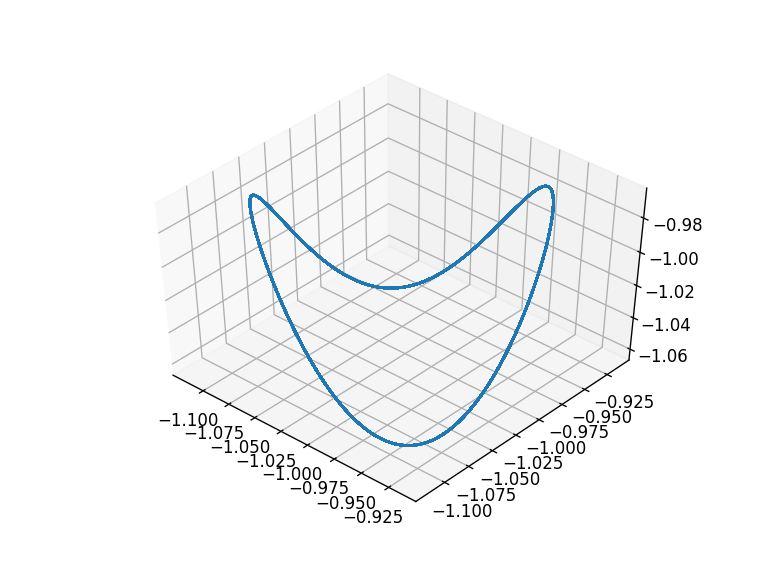

-0.9149999999999999
-1.114999999954566

-0.9150000000113584
-1.1149999999765423

-0.9650000000017995
-1.064999999988271


In [292]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x_circular = []
y_circular = []
z_circular = []
for t in np.arange(0, 100, 0.001):
    x_circular.append(full_movement_height * math.cos(4 * t) - (total_leg_length - full_movement_range) + offset)
    y_circular.append(full_movement_height * math.sin(4 * t) - (total_leg_length - full_movement_range) + offset)
    z_circular.append(full_movement_height * math.sin(4 * t) * math.cos(4 * t) - (total_leg_length - full_movement_range) + offset)

    
print(max(x_circular))
print(min(x_circular))
print()
print(max(y_circular))
print(min(y_circular))
print()
print(max(z_circular))
print(min(z_circular))
ax.plot(x_circular, y_circular, z_circular)